<h1 align="center" style="color:#003366;">Capteur de concentration de polluants</h1>
<h2 align="center" style="color:#00529b;">ECE - École d'Ingénieurs Campus Lyon</h2>
<h3 align="center" style="color:#007acc;">Project Hackathon - Septembre à Décembre, A.A. 2023/2024</h3>

---

## Objectif du Projet
Au sein de ce projet fascinant, notre équipe entreprend avec détermination une Analyse Exploratoire des Données (EDA) en se basant sur un jeu de données émanant de la plateforme Kaggle. Ces données minutieusement compilées retracent les décès à l'échelle mondiale attribués à la pollution atmosphérique. Notre dessein est de mettre en œuvre une gamme exhaustive de techniques issues du domaine de la Science des Données, englobant le raffinement des données, la manipulation experte, la visualisation immersive, l'apprentissage automatique, et l'analyse approfondie.

--- 


🚀 **Points Clés du Projet :**
- Exploration approfondie des données sur les décès liés à la pollution de l'air.
- Utilisation de techniques avancées de Science des Données.
- Manipulation et prétraitement des données pour des analyses précises.
- Visualisation immersive pour une compréhension holistique.
- Application de modèles d'apprentissage automatique pour des insights prédictifs.

## À Propos du Jeu de Données
### Contexte
La pollution de l'air continue d'être la cause du décès de vies innocentes dans le monde. Ces données vous ouvriront les yeux et vous donneront un aperçu éclairant.

### Contenu
Ce jeu de données offre des informations percutantes.

- **Entité:** Il contient le nom du pays.
- **Code:** Il contient le code du pays.
- **Année:** Les années s'étendent de 1990 à 2017.
- **Pollution de l'air (total) (décès pour 100 000 personnes):** Contient le nombre total de décès.
- **Pollution de l'air intérieur (décès pour 100 000 personnes):** Décès dus à la pollution de l'air intérieur.
- **Matières particulaires extérieures (décès pour 100 000 personnes):** Décès dus à la pollution extérieure.
- **Pollution de l'ozone extérieur (décès pour 100 000 personnes):** Décès dus à la pollution par l'ozone.

### Inspiration
- Quelle pollution de l'air est plus dangereuse?
- Réaliser une analyse géopolitique.
- Prévoir le futur. 



**[Lien vers ](https://www.kaggle.com/code/ackittel/analysis-of-deaths-due-to-air-pollution/input)**


<div style="text-align:center">
    <img src="Api.webp" alt="Texte de remplacement" width="600"/>
</div>

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns 
from time import time
from pathlib import Path
from pandas import read_csv
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots




# File system manangement
import os
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')


# Partie 1:  Chargement du jeu de données

In [12]:
# Spécifie le chemin du fichier CSV contenant les données sur les taux de mortalité liés à la pollution de l'air.
Path = './death-rates-from-air-pollution.csv'

# Charge les données à partir du fichier CSV en utilisant la bibliothèque pandas, en spécifiant le délimiteur comme la virgule.
data = pd.read_csv(Path, sep=',')

# Affiche le nombre de lignes et de colonnes dans le jeu de données pour donner une première vue d'ensemble.
print("Le jeu de données d'entrée comporte {} lignes et {} colonnes".format(len(data), len(data.columns)))

# Affiche les premières lignes du jeu de données pour obtenir un aperçu initial des données.
display(data.head())


Le jeu de données d'entrée comporte 6468 lignes et 7 colonnes


,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


# Partie 2: Exploration de notre jeu de données

## Fonction `make_df_dtype(data)`

La fonction `make_df_dtype(data)` a été créée dans le but de générer un DataFrame fournissant un aperçu détaillé des caractéristiques de chaque colonne dans la DataFrame originale `data`.

### Paramètre d'entrée
- `data`: La DataFrame d'origine dont on souhaite générer un aperçu.

### Sortie de la fonction
Un nouveau DataFrame contenant les informations suivantes pour chaque colonne de la DataFrame d'origine :
- Type de données.
- Spécimen de données (une valeur représentative).
- Nombre de valeurs uniques.
- Part des valeurs manquantes.

### Fonctionnement de la fonction
La fonction parcourt chaque colonne de la DataFrame d'origine et recueille les informations mentionnées ci-dessus, puis crée un nouveau DataFrame avec ces informations.

### Structure du DataFrame de sortie
Le DataFrame de sortie a une ligne par colonne de la DataFrame d'origine. Les colonnes du DataFrame de sortie comprennent le type de données (`dtype`), un spécimen de données (`specimen`), le nombre de valeurs uniques (`nunique`), et la part des valeurs manquantes (`%null_values`).

### Utilisation typique
Cette fonction est utile lorsque vous souhaitez obtenir rapidement un aperçu des caractéristiques des colonnes d'une DataFrame, ce qui peut être particulièrement utile au début d'une analyse exploratoire des données pour comprendre la nature des données que vous manipulez.


In [13]:
# Crée un DataFrame pour donner un aperçu des données de la DataFrame originale, colonne par colonne.
def make_df_dtype(data):
    '''
    Crée un DataFrame pour donner un aperçu des données de la DataFrame originale, colonne par colonne.
    Chaque ligne résultante fournit des informations sur chaque colonne :
    - type de données
    - spécimen de données
    - nombre de valeurs uniques
    - part des valeurs manquantes
    
    Args:
        data (DataFrame): La DataFrame avec laquelle travailler.
        
    Returns:
        DataFrame résultant        
    '''
    
    cols, dtype_col, specimens, nunique, null_share = [], [], [], [], []
    for column in data:
        cols.append(column)
        
        # Obtient le type de données de la colonne
        this_dtype = data[column].dtype
        dtype_col.append(this_dtype)
        
        # Obtient un spécimen de données de la colonne
        specimen = data.loc[data[column].first_valid_index(), column]
        specimens.append(specimen)
        
        # Obtient le nombre de valeurs uniques dans la colonne
        nunique.append(data[column].nunique())
        
        # Calcule la part des valeurs manquantes dans la colonne
        null_sum = data[column].isna().sum()
        null_to_len = null_sum / len(data[column])
        null_share.append(f'{null_to_len:.2%}')
        
    # Crée un DataFrame avec les informations collectées
    df = pd.DataFrame(list(zip(dtype_col,
                               specimens,
                               nunique,
                              null_share)),
                      index=cols)    
    df.columns=['dtype',
                'specimen',
                'nunique',
               '%null_values']
 
    return df

In [14]:
make_df_dtype(data)

,dtype,specimen,nunique,%null_values
Entity,object,Afghanistan,231,0.00%
Code,object,AFG,196,15.15%
Year,int64,1990,28,0.00%
"Air pollution (total) (deaths per 100,000)",float64,299.477,6468,0.00%
"Indoor air pollution (deaths per 100,000)",float64,250.363,6468,0.00%
"Outdoor particulate matter (deaths per 100,000)",float64,46.4466,6468,0.00%
"Outdoor ozone pollution (deaths per 100,000)",float64,5.61644,6388,0.00%


## Observations sur le Jeu de Données:

Le jeu de données se compose de 7 colonnes, réparties en deux groupes distincts :
#### Colonnes de Type Catégorique (2)
1. **Colonne Entity**
2. **Colonne Code**

####  Colonnes de Type Numérique (5)
Le groupe des colonnes numériques est subdivisé en trois sous-catégories :
1. **Colonnes de Type Float (4)**
   - Caractérisées par des valeurs décimales.

2. **Colonne de Type Integer (1)**
   - Composée de valeurs entières.

#### Valeurs Manquantes
La colonne "Code" est la seule présentant des valeurs manquantes, représentant 15.15% de l'ensemble total des observations. Ces valeurs manquantes sont associées à des codes pays composés de trois caractères. Étant donné que le jeu de données contient déjà une colonne pour les noms de pays, 'Entity', j'ai opté pour la suppression de cette dernière, considérant que l'information qu'elle contient est redondante.

In [15]:
# Création d'une copie des données pour effectuer le nettoyage
data_clean = data.copy()

# Suppression de la colonne 'Code' dans les données nettoyées
data_clean.drop(['Code'], axis=1, inplace=True)

# Affichage des premières 4 lignes des données nettoyées
display(data_clean.head(3))


,Entity,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,1992,278.963056,232.043878,44.243766,5.611822


In [16]:
# Séparer les variables numériques et catégorielles
donnees_numeriques = data_clean.select_dtypes(include=[np.number]).copy()
donnees_categorielles = data_clean.select_dtypes(exclude=[np.number]).copy()

print("Partie 1. Numérique")
print('Forme des variables numériques :', donnees_numeriques.shape)
# Affichage des colonnes numériques avec des points (•)
print("Colonnes numériques : ")
for col in donnees_numeriques.columns:
    print(f"• {col}")


print("")
print("Partie 2. Catégorique")
print('Forme des variables catégoriques :', donnees_categorielles.shape)
# Affichage des colonnes catégoriques avec des points (•)
print("Colonnes catégoriques : ")
for col in donnees_categorielles.columns:
    print(f"• {col}")

Partie 1. Numérique
Forme des variables numériques : (6468, 5)
Colonnes numériques : 
• Year
• Air pollution (total) (deaths per 100,000)
• Indoor air pollution (deaths per 100,000)
• Outdoor particulate matter (deaths per 100,000)
• Outdoor ozone pollution (deaths per 100,000)

Partie 2. Catégorique
Forme des variables catégoriques : (6468, 1)
Colonnes catégoriques : 
• Entity


# Détection d'anomalies dans les colonnes numériques.

Utilisation de la méthode de la plage interquartile (IQR):

<div style="text-align:center">
    <img src="IQR.png" alt="Texte de remplacement" width="600"/>
</div>


In [63]:
# Method 1: Detecting and Treating Outliers: Removing outliers from data using Python and Pandas.
def get_iqr_values_Specifying_quartile(df_in, col_name,first_quartile,third_quartile):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(first_quartile) # xth percentile / 1st quartile
    q3 = df_in[col_name].quantile(third_quartile) # yth percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-(1.5*iqr) # The minimum value or the |- marker in the box plot
    maximum = q3+(1.5*iqr) # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum


def count_outliers_Specifying_quartile(df_in, col_name,first_quartile,third_quartile):
    _, _, _, _, minimum, maximum = get_iqr_values_Specifying_quartile(df_in, col_name,first_quartile,third_quartile)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

#Replacing Outliers with nan Values
def Replace_Outliers_with_nan_Specifying_quartile(df_in, col_name,first_quartile,third_quartile):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values_Specifying_quartile(df_in, col_name,first_quartile,third_quartile)
    df_in.loc[df_in[col_name] < minimum,col_name] = np.nan
    df_in.loc[df_in[col_name] > maximum,col_name] = np.nan
    return df_in
    
def plot_all_distributions_horizontal(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Sélectionne toutes les colonnes numériques

    # Configuration de la disposition des sous-graphiques
    fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(6 * len(num_cols), 4))

    # Boucle pour créer les graphiques de distribution
    for i, col in enumerate(num_cols):
        sns.distplot(df[col], ax=axes[i])
        axes[i].set_title(f'Distribution de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Fréquence')
        axes[i].grid(True)

    # Ajustement de la mise en page
    plt.tight_layout()

    # Affichage du graphique
    plt.show()

Renommage des Colonnes dans le Dataset des Données Numériques

In [18]:
# Dictionnaire de mappage des noms de colonnes
nouveaux_noms = {
    'Air pollution (total) (deaths per 100,000)': 'Air Pollution',
    'Indoor air pollution (deaths per 100,000)': 'Indoor Air Pollution',
    'Outdoor particulate matter (deaths per 100,000)': 'Outdoor Particulate Matter',
    'Outdoor ozone pollution (deaths per 100,000)': 'Outdoor Ozone Pollution'
}

# Renommer les colonnes
donnees_numeriques.rename(columns=nouveaux_noms, inplace=True)

# Afficher les premières lignes des données avec les nouvelles colonnes
donnees_numeriques.head()

,Year,Air Pollution,Indoor Air Pollution,Outdoor Particulate Matter,Outdoor Ozone Pollution
0,1990,299.477309,250.362910,46.446589,5.616442
1,1991,291.277967,242.575125,46.033841,5.603960
2,1992,278.963056,232.043878,44.243766,5.611822
3,1993,278.790815,231.648134,44.440148,5.655266
4,1994,287.162923,238.837177,45.594328,5.718922


In [31]:
# Créez une figure avec des sous-plots pour chaque colonne
fig = make_subplots(rows=1, cols=len(donnees_numeriques.columns) - 1, subplot_titles=donnees_numeriques.columns[1:])

# Ajoutez une boîte à moustaches pour chaque colonne
for i, col in enumerate(donnees_numeriques.columns[1:]):
    fig.add_trace(go.Box(y=donnees_numeriques[col], name=col), row=1, col=i + 1)

# Mettez à jour la mise en page de la figure
# Mettez à jour la mise en page de la figure avec une légende plus petite
fig.update_layout(
    title_text="Box Plots for Each Column",
    showlegend=True,
    legend=dict(
        orientation="h",  # horizontal orientation
        x=0.5,  # position horizontale de la légende
        y=-0.15,  # position verticale de la légende (négatif pour la placer sous le graphique)
        traceorder='normal',
        font=dict(size=6)  # ajustez la taille du texte de la légende ici
    )
)
# Affichez la figure
fig.show()


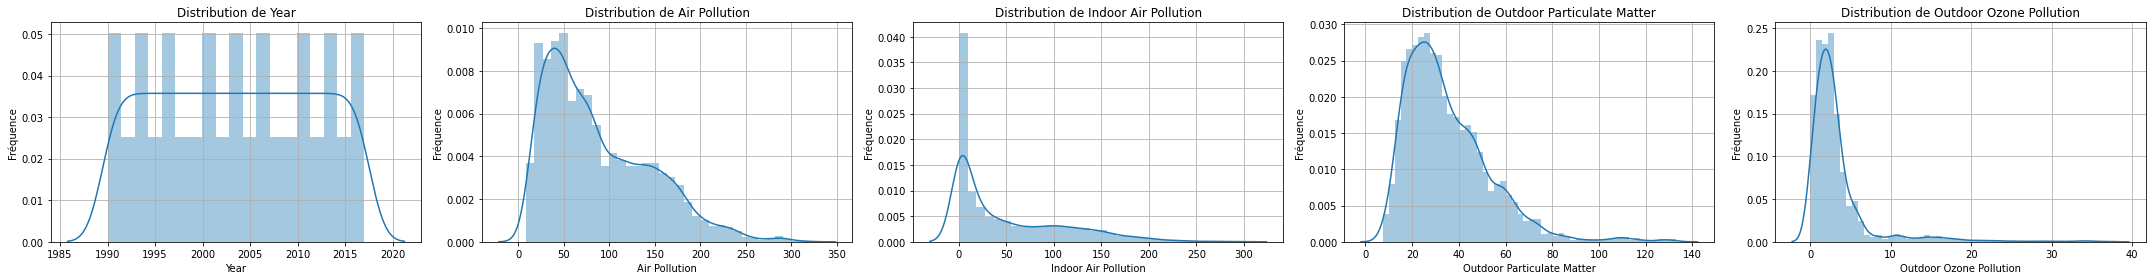

In [57]:
# Utilisation de la fonction pour visualiser toutes les distributions horizontalement
plot_all_distributions_horizontal(donnees_numeriques)

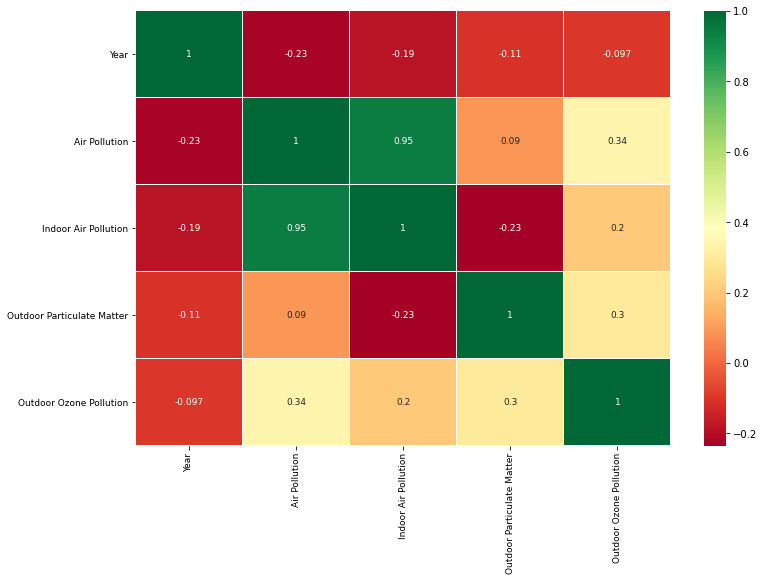

In [79]:
# Trouver la corrélation entre les caractéristiques et la cible

# Afficher la corrélation entre les caractéristiques numériques et la cible
# Imprimons la matrice de corrélation pour voir l'interdépendance entre les caractéristiques dans un graphique en paires

# Utilisation d'une carte thermique (heatmap) pour visualiser la corrélation
sns.heatmap(donnees_numeriques.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 9})

# Ajuster la taille de la figure
fig = plt.gcf()
fig.set_size_inches(12, 8)

# Ajuster la taille des étiquettes sur les axes x et y
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Afficher le graphique
plt.show()


In [75]:
# Initialisation des listes
columns_with_outliers = []
number_outliers = []
number_no_outliers = []
percentale_of_outliers = []

# Boucle pour chaque colonne
for feature_name in donnees_numeriques.columns:
    outliers_count = count_outliers_Specifying_quartile(donnees_numeriques, feature_name, 0.25, 0.75)
    if outliers_count > 0:
        columns_with_outliers.append(feature_name)
        number_outliers.append(outliers_count)
        percentale_of_outliers.append(np.round((outliers_count / len(donnees_numeriques)) * 100, 3))
        number_no_outliers.append(len(donnees_numeriques) - outliers_count)

# Création du DataFrame
informations = {
    'Column': columns_with_outliers,
    'Outliers': number_outliers,
    'Not Outliers': number_no_outliers,
    'Outliers (%)': percentale_of_outliers
}

df_informations = pd.DataFrame(informations)

# Tri du DataFrame par pourcentage d'outliers
df_informations.sort_values(by=['Outliers (%)'], inplace=True, ascending=False)

# Affichage du résultat
display(df_informations)

# Supposons que df_informations est votre DataFrame
# Assurez-vous d'ajuster les noms de colonnes en fonction de votre structure de données
fig = px.bar(df_informations, x='Column', y='Outliers', color='Column',
             labels={'Outliers': 'Nombre d\'Outliers'},
             title='Nombre d\'Outliers dans Différentes Colonnes',
             height=400)

fig.show()

,Column,Outliers,Not Outliers,Outliers (%)
3,Outdoor Ozone Pollution,528,5940,8.163
2,Outdoor Particulate Matter,150,6318,2.319
1,Indoor Air Pollution,55,6413,0.850
0,Air Pollution,48,6420,0.742


### Traitement des Valeurs Aberrantes

Au cours de cette section, nous allons explorer la méthode KNN pour le traitement des valeurs aberrantes.

#### Étape 1 : Remplacement par NaN
Nous débutons en remplaçant toutes les valeurs aberrantes par NaN.

#### Étape 2 : Imputation avec KNN
Ensuite, nous appliquerons la méthode KNN pour l'imputation des valeurs manquantes.


In [78]:
data_clean = donnees_numeriques.copy()
q1, q3 = 0.25, 0.75

for feature in donnees_numeriques.columns.tolist():
    # Remplacement des valeurs aberrantes par des valeurs NaN
    data_clean = Replace_Outliers_with_nan_Specifying_quartile(data_clean, feature, q1, q3)


Nos données sont désormais propres et organisées. Nous pouvons poursuivre notre analyse.

# Partie 3: Visualisation

Pour commencer, nous allons tracer des graphiques linéaires simples représentant le nombre total de décès et les décès par type de pollution de l'air.

Nous allons utilisé la bibliothèque Matplotlib pour créer une figure avec deux sous-graphiques (subplots) affichant des graphiques de lignes pour les données sur les décès dus à la pollution de l'air.

In [71]:
import plotly.subplots as sp
import plotly.graph_objs as go

# Création d'une figure avec deux sous-graphiques
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Total des Décès dus à la Pollution de l\'Air', 'Décès dus à la Pollution de l\'Air par Type'])

# Tracé du premier sous-graphique (Total des décès)
fig.add_trace(go.Scatter(x=countries.groupby('Year').mean().index, y=countries.groupby('Year').mean().iloc[:,0], mode='lines', 
                name='Total des Décès', showlegend=False),
                row=1, col=1)

# Tracé du deuxième sous-graphique (Décès par type)
fig.add_trace(go.Scatter(x=countries.groupby('Year').mean().index, y=countries.groupby('Year').mean().iloc[:,1], mode='lines', 
                name='Intérieur'),
                row=1, col=2)
fig.add_trace(go.Scatter(x=countries.groupby('Year').mean().index, y=countries.groupby('Year').mean().iloc[:,2], mode='lines', 
                name='Extérieur'),
                row=1, col=2)
fig.add_trace(go.Scatter(x=countries.groupby('Year').mean().index, y=countries.groupby('Year').mean().iloc[:,3], mode='lines', 
                name='Ozone'),
                row=1, col=2)

# Mise en forme de la figure avec des dimensions plus grandes
# Mise en forme de la figure
fig.update_layout(title_text="Analyse des Décès liés à la Pollution de l'Air",
                  title_font_size=20,
                  title_font_family='sans-serif',
                  showlegend=True,  # Afficher la légende
                  legend=dict(x=0.85, y=0.10),
                  xaxis=dict(title='Année'),
                  yaxis=dict(title='Décès par 100 000 habitants'),  # Suppression de 'size'
                  font=dict(family='sans-serif'),
                  height=400,  # Ajuster la hauteur
                  width=1000)  # Ajuster la largeur
fig.show()


observation : Les résultats initiaux sont surprenants. Dans tous les cas, nous observons une nette réduction des décès dans le monde imputables à la pollution de l'air. Examinons le même graphique par région pour voir si cela se confirme.

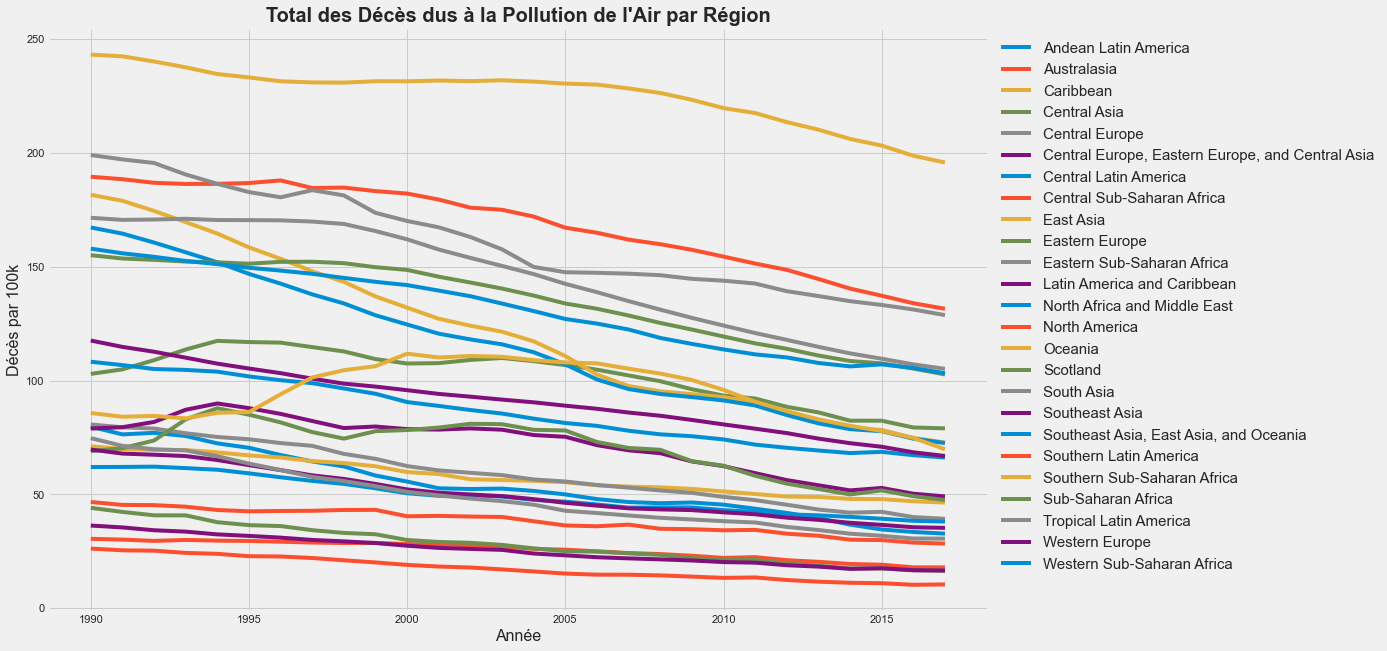

In [81]:
# Commentaires dans le code

# Création d'une figure avec une taille de 15x10 pouces
plt.figure(figsize=(15, 10))  

# Utilisation d'une boucle pour ajouter des lignes pour chaque région
for r in region:
    # Tracé des données de chaque région au fil des années
    plt.plot(regions[regions['Entity'] == r].groupby('Year').mean().iloc[:, 0], label=r)

# Étiquetage de l'axe des x
plt.xlabel('Année', size=16)  

# Étiquetage de l'axe des y
plt.ylabel('Décès par 100k', size=16)  

# Ajout d'un titre au graphique
plt.title('Total des Décès dus à la Pollution de l\'Air par Région', size=20, fontfamily='sans-serif', fontweight='bold')  

# Ajout d'une légende avec une mise en page spécifique
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", prop={'size': 15})

# Utilisation d'un style de graphique (fivethirtyeight) incluant des lignes de grille
plt.style.use('fivethirtyeight')  



Observation: Ce graphique est assez confus, mais il semble que dans presque tous les cas, nous observons une tendance à la baisse. Pour être plus précis, nous devrions recourir à l'apprentissage automatique pour entraîner des modèles de régression linéaire sur les données. La pente de chaque ligne nous informera sur la direction et la gravité de la tendance.

# Partie 4: Apprentissage automatique

## Analyse des Tendances avec l'Apprentissage Automatique

Dans la section précédente, les graphiques ont révélé une tendance linéaire négative évidente. Pour approfondir notre compréhension, nous allons maintenant utiliser l'apprentissage automatique pour entraîner un modèle de régression linéaire sur ces données.

### Modèle de Régression Linéaire

Les visualisations antérieures ont mis en lumière une relation linéaire claire. Afin d'explorer davantage cette dynamique, nous utiliserons un modèle de régression linéaire pour modéliser les tendances observées.

### Préparation des Données

À ce stade, nous ne diviserons pas encore les données en ensembles d'entraînement et de test, car l'objectif actuel est une analyse exploratoire plutôt que des prédictions précises.

Cela nous permettra d'approfondir notre compréhension des relations entre les variables avant de passer à des étapes plus avancées de l'apprentissage automatique.

*Note: Les modèles générés dans cette section ne seront pas utilisés à des fins prédictives dans cette analyse.*

Restez à l'écoute pour des insights plus approfondis obtenus grâce à notre exploration de l'apprentissage automatique !


Les graphiques ci-dessus montrent une tendance linéaire négative très apparente. En raison de cela, nous allons entraîner un modèle de régression linéaire sur les données. Nous n'utiliserons pas ces modèles pour des prédictions, donc nous ne diviserons pas encore les données en ensembles d'entraînement et de test.